## AgeBinned Phase 3 (Data Preparation): Binning Idee

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 15](https://data-science.training/kapitel-15/)
* Datum: 23.03.2023

Age: kardinalskaliert => Regression

AgeBinned (Umwandlung mittels Binning): ordinalskaliert => Mehrklassen-Klassifikation

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt

In [5]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [6]:
# Trainings- und Testdaten zusammenführen
#  (KNIME "Concatenate")
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# Datentypen automatisch konvertieren
df = df.convert_dtypes()

In [8]:
# Fehlende Werte prüfen
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
# Spezielle Titanic-Statistik (Überlebenswahrscheinlichkeiten)
def dst_titanic_statistics(df, col):
    stats = df.groupby([col], as_index=False, observed=True)['PassengerId'].count() # Spalte "PassengerId" aus Titanic-Daten
    probs = df.groupby([col], as_index=False, observed=True)['Survived'].mean()     # Spalte "Survived"    aus Titanic-Daten
    stats = stats.merge(probs, on=col)
    stats = stats.rename(columns={'PassengerId': 'Anzahl', 'Survived': 'Überlebenswahrscheinlichkeit'})
    return stats

In [10]:
# Age Binning - Teil 1: Automatisches Binning (mittels Quantile)
df['AgeBinned'] = pd.qcut(df['Age'].dropna(), 6)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,"(0.169, 18.0]",193,0.503597
1,"(18.0, 23.0]",167,0.308411
2,"(23.0, 28.0]",176,0.387931
3,"(28.0, 34.0]",163,0.413793
4,"(34.0, 45.0]",192,0.421053
5,"(45.0, 80.0]",155,0.368932


In [11]:
# Age Binning - Teil 2: Manuelles Binning
bins = [0, 12, 24, 45, 60, 120]
labels = ['Child', 'YoungAdult', 'Adult', 'OlderAdult', 'Senior']
df['AgeBinned'] = pd.cut(df['Age'], bins, right=False, labels=labels)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,Child,91,0.573529
1,YoungAdult,270,0.357542
2,Adult,509,0.409091
3,OlderAdult,136,0.404494
4,Senior,40,0.269231


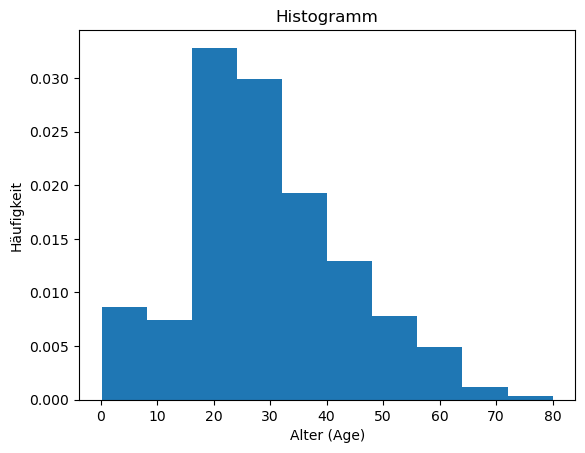

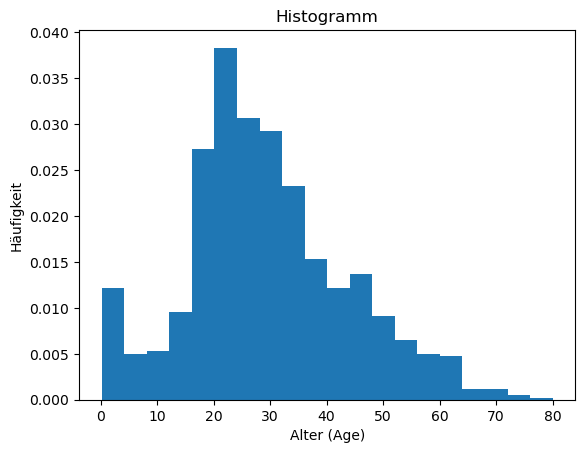

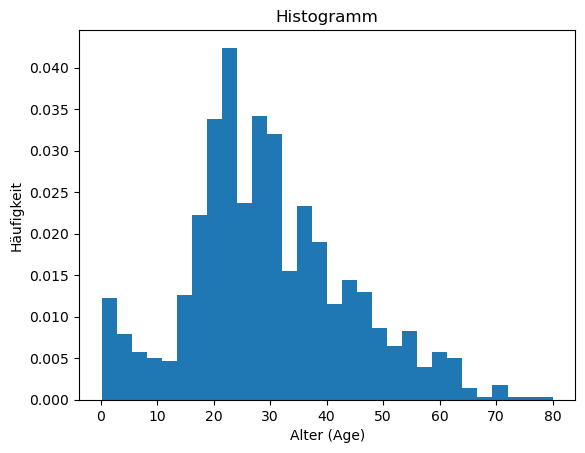

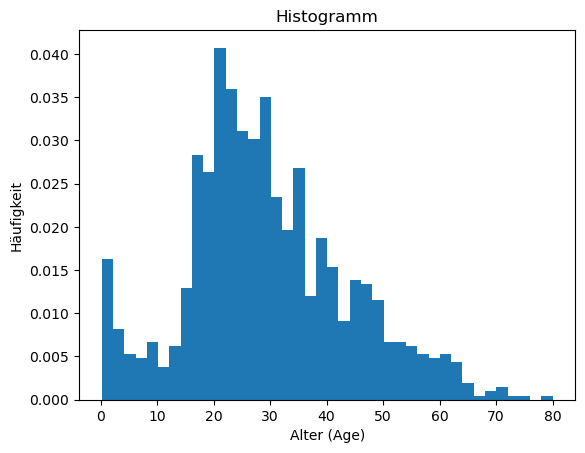

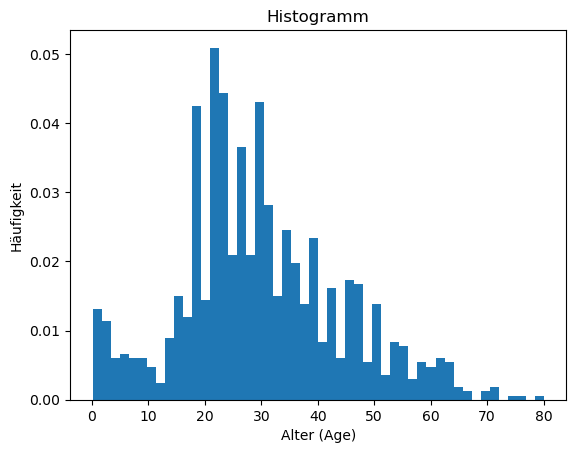

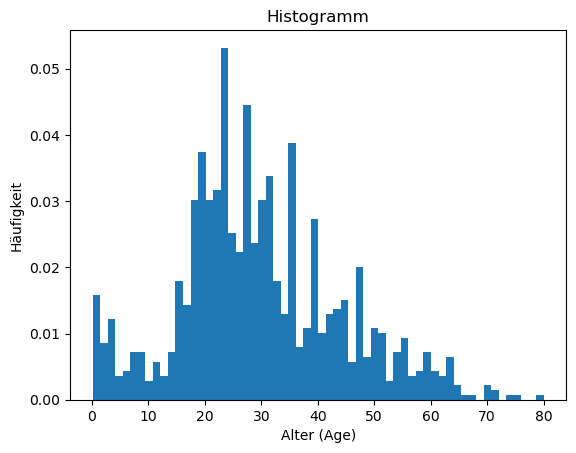

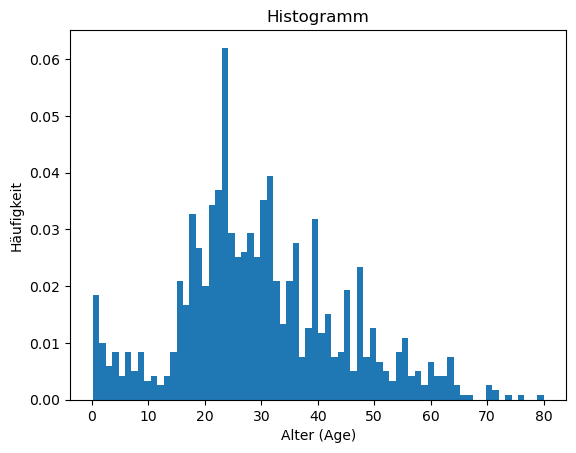

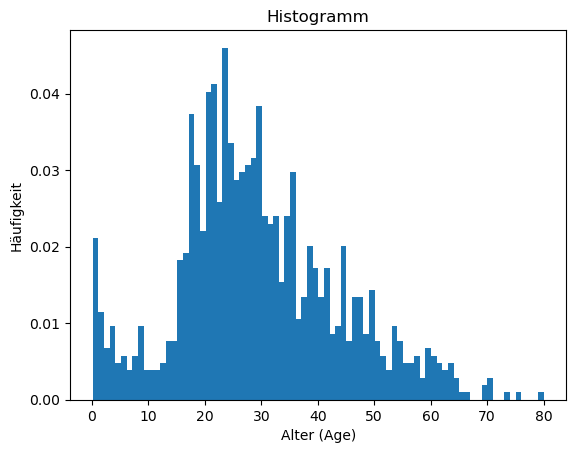

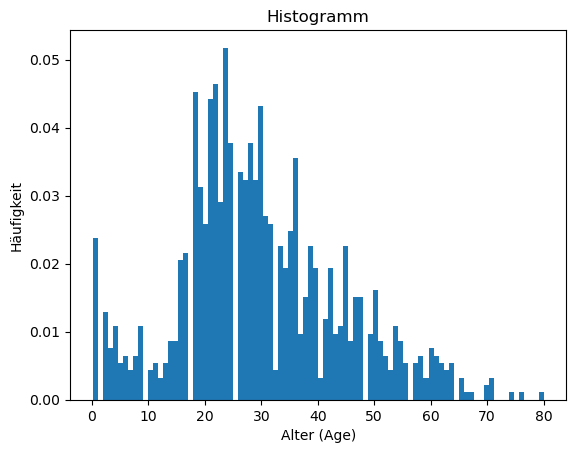

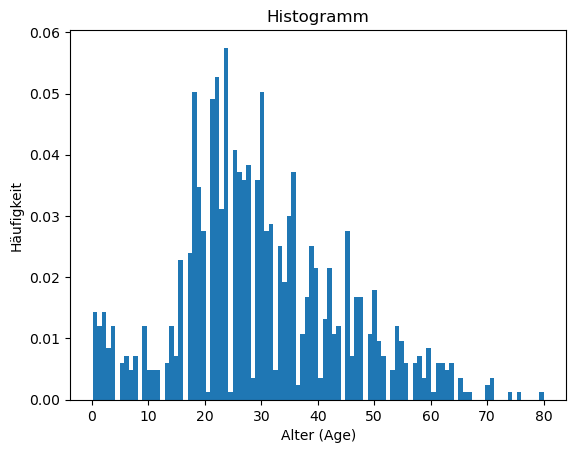

In [12]:
# Histogramm des Attributs Age
age = df['Age'].dropna()
for n in range(10, 110, 10):
    plt.hist(age, bins=n, density=True)
    plt.title('Histogramm')
    plt.xlabel('Alter (Age)')
    plt.ylabel('Häufigkeit')
    plt.show()

In [13]:
# Age Binning - Teil 3: Manuelles Binning
bins = [0, 10, 20, 30, 40, 60, 120]
labels = ['Child', 'Teenage', 'Young', 'Adult', 'Middle', 'Senior']
df['AgeBinned'] = pd.cut(df['Age'], bins, right=False, labels=labels)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,Child,82,0.612903
1,Teenage,143,0.401961
2,Young,344,0.35
3,Adult,232,0.437126
4,Middle,205,0.394161
5,Senior,40,0.269231


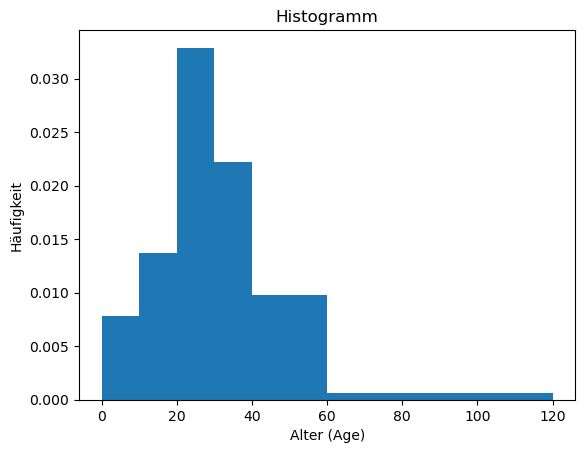

In [14]:
# Histogramm des Attributs Age
age = df['Age'].dropna()
plt.hist(age, bins=bins, density=True)
plt.title('Histogramm')
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')
plt.show()